In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [115]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/My Drive/Dataset599.csv')

In [117]:
# Clean SYMBOL column
df['SYMBOL'] = df['SYMBOL'].astype(str).str.strip().str.upper()
filtered_df['SYMBOL'] = filtered_df['SYMBOL'].astype(str).str.strip().str.upper()

columns_to_keep = [
    'ENSEMBL',
    'SYMBOL',
    'GENENAME',
    'REFSEQ',
    'ENTREZID',
    'STRING_id',
    'GOSLIM_IDS',
    'Log2fc_(Space Flight)v(Ground Control)',
    'Stat_(Space Flight)v(Ground Control)',
    'P.value_(Space Flight)v(Ground Control)',
    'Adj.p.value_(Space Flight)v(Ground Control)'
]


df = df[columns_to_keep]


In [123]:
len(df)

17245

In [118]:
filtered_df = df[df['Adj.p.value_(Space Flight)v(Ground Control)'] <= 0.05]

# Remove rows where SYMBOL is NaN or the literal string "NAN"
filtered_df = filtered_df[
    (filtered_df['SYMBOL'].notna()) &
    (filtered_df['SYMBOL'] != '') &
    (filtered_df['SYMBOL'] != 'NAN') &
    (filtered_df['SYMBOL'] != 'NA')
]
print(filtered_df)

                  ENSEMBL   SYMBOL  \
48     ENSMUSG00000000340      DBT   
128    ENSMUSG00000000958   SLC7A7   
276    ENSMUSG00000001918   SLC1A5   
334    ENSMUSG00000002265     PEG3   
443    ENSMUSG00000002997  PRKAR2B   
...                   ...      ...   
16692  ENSMUSG00000115293  GM49333   
16922  ENSMUSG00000118667   AHNAK2   
16927  ENSMUSG00000118841    RN7S2   
16928  ENSMUSG00000118866    RN7S1   
17243  ENSMUSG00002076083   KLHL17   

                                                GENENAME  \
48       dihydrolipoamide branched chain transacylase E2   
128    solute carrier family 7 (cationic amino acid t...   
276    solute carrier family 1 (neutral amino acid tr...   
334                               paternally expressed 3   
443    protein kinase, cAMP dependent regulatory, typ...   
...                                                  ...   
16692                              predicted gene, 49333   
16922                              AHNAK nucleoprotein 2   
169

In [119]:
# Sort and get top 10 upregulated and downregulated
top10_up = filtered_df.sort_values('Log2fc_(Space Flight)v(Ground Control)', ascending=False).head(10)
top10_down = filtered_df.sort_values('Log2fc_(Space Flight)v(Ground Control)').head(10)

# Combine into one table
top_bottom_20 = pd.concat([top10_down, top10_up])

top_bottom_20[['SYMBOL', 'GENENAME', 'Log2fc_(Space Flight)v(Ground Control)', 'Adj.p.value_(Space Flight)v(Ground Control)']]

,SYMBOL,GENENAME,Log2fc_(Space Flight)v(Ground Control),Adj.p.value_(Space Flight)v(Ground Control)
2138,MYL7,"myosin, light polypeptide 7, regulatory",-11.993062,1.637117e-12
10197,SLN,sarcolipin,-11.418798,1.964131e-05
10570,CILP2,cartilage intermediate layer protein 2,-10.116424,9.437907e-04
13469,MYBPHL,myosin binding protein H-like,-9.700996,1.903815e-05
4580,TMEM163,transmembrane protein 163,-9.152769,1.854982e-03
12870,MYL4,"myosin, light polypeptide 4",-9.093049,1.901345e-10
6009,BMP3,bone morphogenetic protein 3,-8.902884,3.172520e-02
3130,FGF12,fibroblast growth factor 12,-7.635786,8.586176e-05
12175,LMNTD1,lamin tail domain containing 1,-7.556620,4.078851e-04
14663,SBK3,"SH3 domain binding kinase family, member 3",-7.498077,3.310408e-06


In [120]:
# Convert column to numeric if needed
filtered_df['Log2fc'] = pd.to_numeric(filtered_df['Log2fc_(Space Flight)v(Ground Control)'], errors='coerce')

# Basic statistics
log2fc_stats = filtered_df['Log2fc'].describe()
print(log2fc_stats)

count    134.000000
mean      -1.810441
std        3.099025
min      -11.993062
25%       -2.867595
50%       -1.125881
75%        0.633852
max        5.798888
Name: Log2fc, dtype: float64


/tmp/ipython-input-3133309922.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


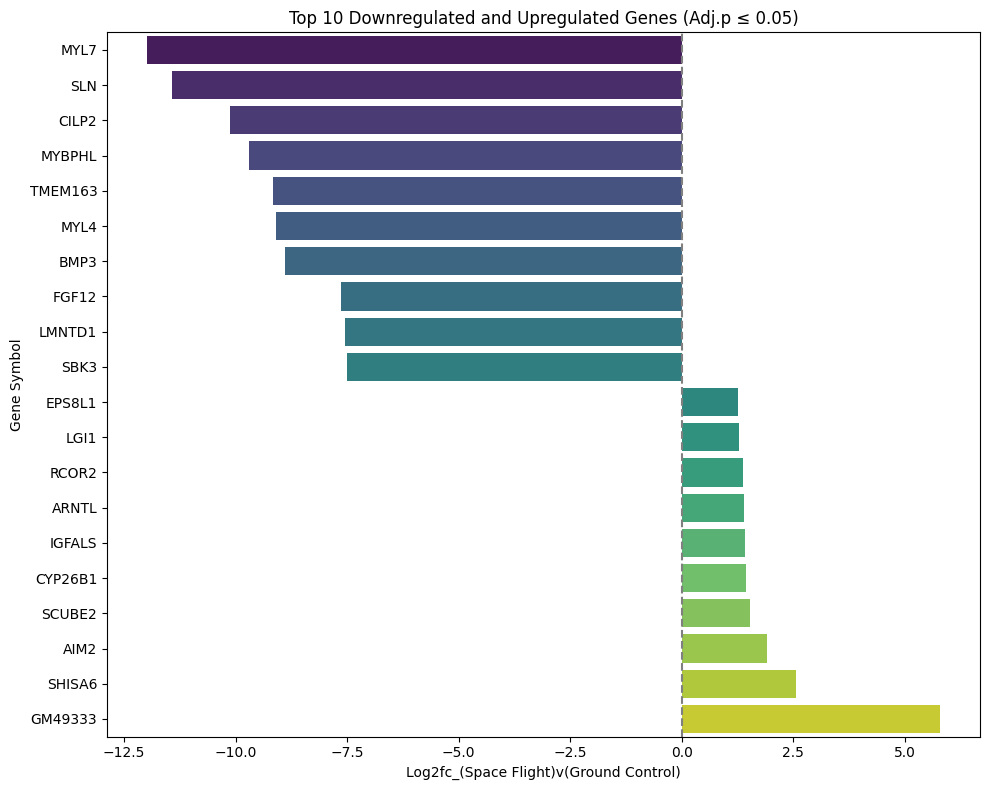

In [121]:

# Convert to numeric (if needed)
filtered_df['Log2fc'] = pd.to_numeric(filtered_df['Log2fc_(Space Flight)v(Ground Control)'], errors='coerce')

# Get top 10 upregulated and top 10 downregulated genes
top_up = filtered_df.sort_values('Log2fc', ascending=False).head(10)
top_down = filtered_df.sort_values('Log2fc').head(10)
top_genes = pd.concat([top_up, top_down])

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Log2fc',
    y='SYMBOL',
    data=top_genes.sort_values('Log2fc', ascending=True),  # sort for visual clarity
    palette='viridis'
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 10 Downregulated and Upregulated Genes (Adj.p ≤ 0.05)')
plt.xlabel('Log2fc_(Space Flight)v(Ground Control)')
plt.ylabel('Gene Symbol')
plt.tight_layout()
plt.show()

In [127]:
genes_of_interest = ['ARNTL', 'AIM2', 'SLN', 'FGF12']
selected_genes_df = filtered_df[filtered_df['SYMBOL'].isin(genes_of_interest)]
print(selected_genes_df[
    ['SYMBOL', 'GENENAME', 'Log2fc_(Space Flight)v(Ground Control)', 'Adj.p.value_(Space Flight)v(Ground Control)']
].to_string(index=False))

SYMBOL                                            GENENAME  Log2fc_(Space Flight)v(Ground Control)  Adj.p.value_(Space Flight)v(Ground Control)
 FGF12                         fibroblast growth factor 12                               -7.635786                                     0.000086
  AIM2                                absent in melanoma 2                                1.908337                                     0.030136
   SLN                                          sarcolipin                              -11.418798                                     0.000020
 ARNTL aryl hydrocarbon receptor nuclear translocator-like                                1.387939                                     0.018705
